In [3]:
import pandas as pd
import os
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from imblearn.over_sampling import SMOTE

import seaborn as sns
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from joblib import dump

In [4]:
folder_path = 'MachineLearningCVE'

In [5]:
def count_files_in_directory(directory):
    try:
        # List all files and directories in the specified directory
        entries = os.listdir(directory)
        
        # Count only files (not directories)
        file_count = sum(1 for entry in entries if os.path.isfile(os.path.join(directory, entry)))
        
        return file_count
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [6]:
file_count = count_files_in_directory(folder_path)
file_count

8

In [7]:
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv")]
file_list

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [8]:
data = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in file_list], ignore_index=True)

In [9]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
data = data.drop(columns=['Flow ID', 'Timestamp'], errors='ignore')

In [11]:
# Replace missing/infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
 # Take 10% of the data
# data = data.sample(frac=0.1, random_state=42)
# data.shape

In [13]:
count = data['Label'].value_counts()
count

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [14]:
data['Binary_Label'] = data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [15]:
encoder = LabelEncoder()
data['Encoded_Label'] = encoder.fit_transform(data['Label'])

In [16]:

scaler = MinMaxScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [17]:
X = data.drop(['Label', 'Binary_Label', 'Encoded_Label'], axis=1)  # Features
y = data['Binary_Label']  # Target variable for binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
y_test

176112     0.0
264817     0.0
205084     0.0
1368918    0.0
2720654    0.0
          ... 
320048     1.0
2830090    0.0
1873349    0.0
2629528    0.0
1833536    0.0
Name: Binary_Label, Length: 565576, dtype: float64

In [19]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[453710    379]
 [   387 111100]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    454089
         1.0       1.00      1.00      1.00    111487

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



New check

In [21]:
y_test

176112     0.0
264817     0.0
205084     0.0
1368918    0.0
2720654    0.0
          ... 
320048     1.0
2830090    0.0
1873349    0.0
2629528    0.0
1833536    0.0
Name: Binary_Label, Length: 565576, dtype: float64

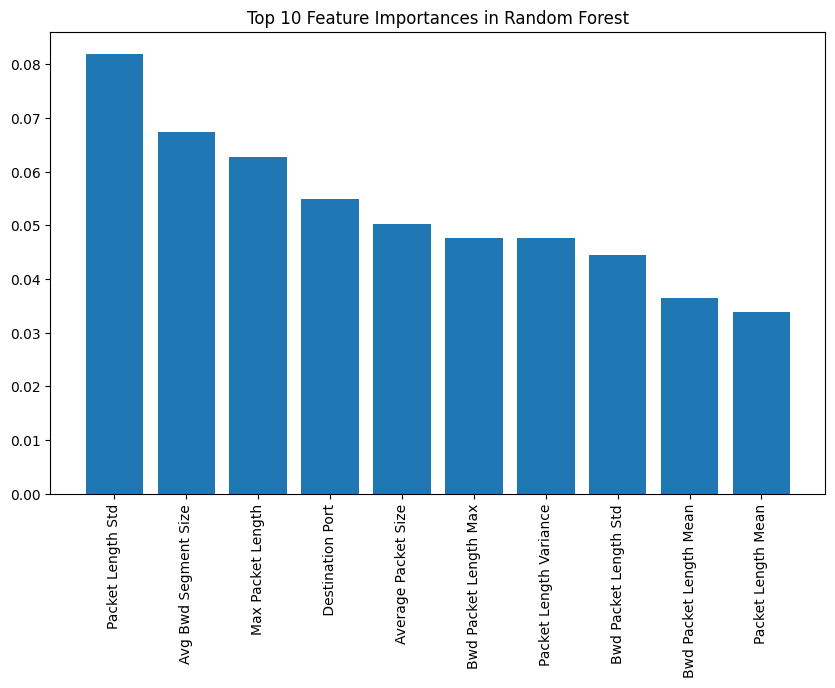

In [23]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices[:10])), importances[sorted_indices[:10]], align="center")
plt.xticks(range(len(sorted_indices[:10])), X.columns[sorted_indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()


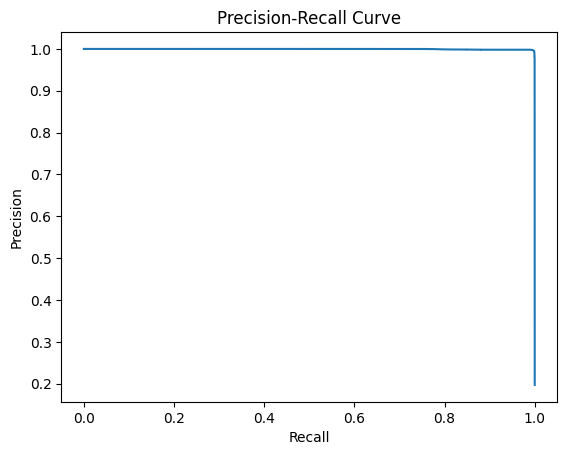

In [24]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [25]:
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination rate
iso_forest.fit(X_train)
anomalies = iso_forest.predict(X_test)

C:\Users\nazib\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


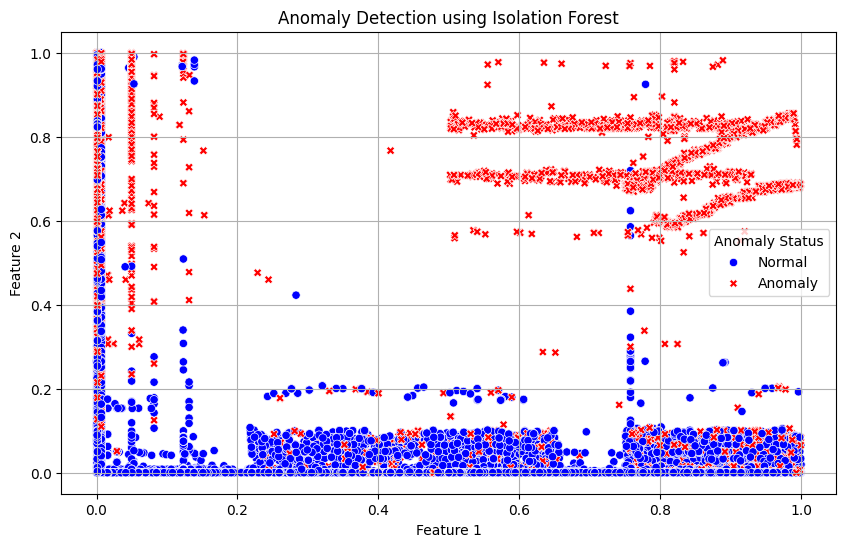

In [26]:
anomalous_data = X_test[anomalies == -1]  # Filter the flagged anomalies
# print(anomalous_data)
# print(anomalies)

# Create a DataFrame for visualization
X_test['anomaly'] = anomalies
X_test['anomaly'] = X_test['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test, x=X_test.columns[0], y=X_test.columns[1], hue='anomaly', style='anomaly', palette={'Normal': 'blue', 'Anomaly': 'red'}, markers={'Normal': 'o', 'Anomaly': 'X'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.legend(title='Anomaly Status')
plt.grid()
plt.show()

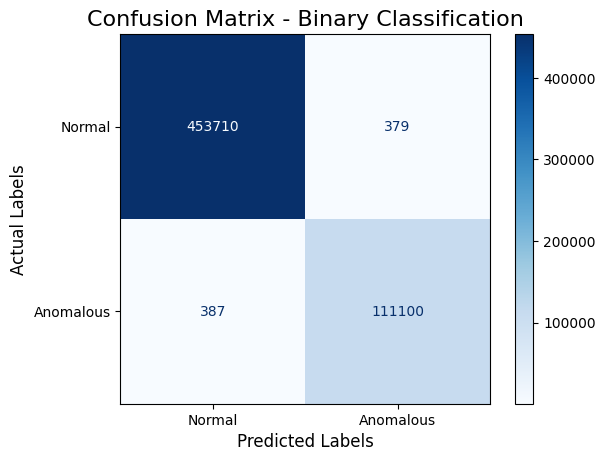

In [27]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalous"])

# Plot the confusion matrix
disp.plot(cmap="Blues", values_format="d", colorbar=True)

# Add title and labels
plt.title("Confusion Matrix - Binary Classification", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)

# Customize tick marks for better visibility
plt.xticks(ticks=[0, 1], labels=["Normal", "Anomalous"], fontsize=10)
plt.yticks(ticks=[0, 1], labels=["Normal", "Anomalous"], fontsize=10)

# # Add percentage labels on top of each box
# for i in range(len(cm)):
#     for j in range(len(cm[i])):
#         # Calculate the percentage
#         percentage = cm[i, j] / cm.sum() * 100
#         # Annotate with percentage and count
#         plt.text(j, i, f"{cm[i, j]}\n({percentage:.2f}%)", ha="center", va="center", color="black")

# Show the plot
plt.show()

In [28]:
# dump(y_pred, 'rf_model.joblib')

New Dataset

In [29]:
unsw_data = pd.read_csv("MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

In [57]:
unsw_data = data.sample(n=50, random_state=42)

In [58]:
unsw_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Binary_Label,Encoded_Label
176112,0.585107,9.205005e-02,0.000000,0.000017,4.651163e-07,4.576987e-08,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.000342,0.000342,0.091667,0.000000,0.091667,0.091667,BENIGN,0.0,0.000000
264817,0.001221,1.276342e-03,0.000009,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
205084,0.006760,5.102475e-01,0.000086,0.000062,1.924031e-04,1.157062e-05,0.024013,0.000000,0.020889,0.026176,...,0.003769,0.006687,0.000459,0.083290,0.000132,0.083333,0.083136,BENIGN,0.0,0.000000
1368918,0.000809,9.841666e-06,0.000005,0.000007,7.286822e-06,3.356457e-07,0.001894,0.020215,0.007911,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
2720654,0.650904,4.666666e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
2472860,0.006760,6.514049e-03,0.000105,0.000110,8.612403e-05,8.656150e-05,0.020830,0.000000,0.007792,0.018464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
1542148,0.673457,4.583333e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
1306022,0.991363,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
1190454,0.858610,6.124999e-06,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
2401551,0.001221,1.416667e-07,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DoS Hulk,1.0,0.285714


In [59]:
unsw_data = unsw_data.drop(columns=['Flow ID', 'Timestamp'], errors='ignore')

In [60]:
unsw_data = unsw_data.replace([np.inf, -np.inf], np.nan).dropna()
unsw_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Binary_Label,Encoded_Label
176112,0.585107,9.205005e-02,0.000000,0.000017,4.651163e-07,4.576987e-08,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.000342,0.000342,0.091667,0.000000,0.091667,0.091667,BENIGN,0.0,0.000000
264817,0.001221,1.276342e-03,0.000009,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
205084,0.006760,5.102475e-01,0.000086,0.000062,1.924031e-04,1.157062e-05,0.024013,0.000000,0.020889,0.026176,...,0.003769,0.006687,0.000459,0.083290,0.000132,0.083333,0.083136,BENIGN,0.0,0.000000
1368918,0.000809,9.841666e-06,0.000005,0.000007,7.286822e-06,3.356457e-07,0.001894,0.020215,0.007911,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
2720654,0.650904,4.666666e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
2472860,0.006760,6.514049e-03,0.000105,0.000110,8.612403e-05,8.656150e-05,0.020830,0.000000,0.007792,0.018464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
1542148,0.673457,4.583333e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
1306022,0.991363,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
1190454,0.858610,6.124999e-06,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BENIGN,0.0,0.000000
2401551,0.001221,1.416667e-07,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DoS Hulk,1.0,0.285714


In [61]:
unsw_data['Label'].value_counts()

Label
BENIGN      44
DoS Hulk     3
PortScan     3
Name: count, dtype: int64

In [62]:
unsw_data['Binary_Label'] = unsw_data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [63]:
unsw_data['Encoded_Label'] = encoder.fit_transform(unsw_data['Label'])

In [64]:
unsw_data[numerical_columns] = scaler.transform(unsw_data[numerical_columns])

In [65]:
X_unsw = unsw_data.drop(['Label', 'Binary_Label', 'Encoded_Label'], axis=1)
y_unsw = unsw_data['Label']

In [66]:
y_unsw.unique()

array(['BENIGN', 'DoS Hulk', 'PortScan'], dtype=object)

In [67]:
predictions = model.predict(X_unsw)
print(predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [68]:
predictions_proba_x = model.predict_proba(X_unsw)
# predictions_proba_y = model.predict_proba(y_unsw)
print(predictions_proba_x)

[[0.7842546  0.2157454 ]
 [0.8478223  0.1521777 ]
 [0.81424021 0.18575979]
 [0.85657259 0.14342741]
 [0.7842546  0.2157454 ]
 [0.8299545  0.1700455 ]
 [0.7842546  0.2157454 ]
 [0.8478223  0.1521777 ]
 [0.7842546  0.2157454 ]
 [0.8478223  0.1521777 ]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]
 [0.8299545  0.1700455 ]
 [0.8478223  0.1521777 ]
 [0.81424021 0.18575979]
 [0.7842546  0.2157454 ]
 [0.85657259 0.14342741]
 [0.7842546  0.2157454 ]
 [0.85657259 0.14342741]
 [0.81424021 0.18575979]
 [0.85657259 0.14342741]
 [0.8299545  0.1700455 ]
 [0.8299545  0.1700455 ]
 [0.7842546  0.2157454 ]
 [0.85657259 0.14342741]
 [0.8199545  0.1800455 ]
 [0.8478223  0.1521777 ]
 [0.81424021 0.18575979]
 [0.8478223  0.1521777 ]
 [0.85657259 0.14342741]
 [0.81424021 0.18575979]
 [0.85657259 0.14342741]
 [0.81424021 0.18575979]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]
 [0.85657259 0.14342741]


In [69]:
# Choose the class with the highest probability
predictions_x = np.argmax(predictions_proba_x, axis=1)
# predictions_y = np.argmax(y_unsw, axis=1)

In [70]:
predictions_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [71]:
prediction_labels = encoder.inverse_transform(predictions_x)
# true_labels = encoder.inverse_transform(y_unsw)
print(prediction_labels)

['BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'BENIGN']


In [72]:
result_counts = pd.Series(prediction_labels).value_counts()

In [73]:
print("\nPrediction Results:")
print(result_counts)


Prediction Results:
BENIGN    50
Name: count, dtype: int64


In [74]:
print(classification_report(y_unsw, prediction_labels, target_names=encoder.classes_))

              precision    recall  f1-score   support

      BENIGN       0.88      1.00      0.94        44
    DoS Hulk       0.00      0.00      0.00         3
    PortScan       0.00      0.00      0.00         3

    accuracy                           0.88        50
   macro avg       0.29      0.33      0.31        50
weighted avg       0.77      0.88      0.82        50



C:\Users\nazib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nazib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nazib\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [47]:
cicids_featuers = list(X_train.columns)
unsw_features = list(unsw_data.columns)

In [48]:
missing_features = set(cicids_featuers) - set(unsw_features)
extra_features = set(unsw_features) - set(cicids_featuers)

In [49]:
for feature in missing_features:
    unsw_data[feature] = 0

In [50]:
unsw_data = unsw_data[cicids_featuers]

In [51]:
unsw_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000336,1.491667e-06,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.917800,7.999999e-07,0.000000,0.000007,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,0.001877,8.329999e-04,0.000000,0.000003,3.720930e-06,7.323179e-08,0.001934,0.020645,0.008080,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,0.001877,3.085833e-04,0.000000,0.000003,3.720930e-06,7.323179e-08,0.001934,0.020645,0.008080,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,9.263445e-01,0.000664,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,1.0,0.015943,0.028615,0.043845,8.636364e-07,0.078859,0.034561,0.113333,0.047502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288597,0.001221,4.924525e-03,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
288598,0.001221,9.900007e-03,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
288599,0.001221,1.916666e-07,0.000000,0.000031,4.651163e-07,8.238577e-08,0.000242,0.002581,0.001010,0.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
288600,0.002106,2.666666e-07,0.000041,0.000000,1.837209e-04,0.000000e+00,0.009549,0.101935,0.039893,0.0,...,0.000042,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [52]:
X_unsw = scaler.transform(unsw_data)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Binary_Label
- Encoded_Label


In [ ]:
unsw_scaler = MinMaxScaler()
numerical_columns = unsw_data.select_dtypes(include=['float64', 'int64']).columns

X_unsw = unsw_scaler.fit_transform(unsw_data[numerical_columns])

In [ ]:
X_unsw

array([[0.00000000e+00, 2.02463370e-03, 5.20020801e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.70320520e-06, 1.08317020e-02, 1.35205408e-03, ...,
        8.19672131e-02, 0.00000000e+00, 0.00000000e+00],
       [1.14064104e-05, 2.70521550e-02, 7.28029121e-04, ...,
        8.19672131e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99988594e-01, 1.50000028e-07, 1.04004160e-04, ...,
        1.80327869e-01, 0.00000000e+00, 1.00000000e+00],
       [9.99994297e-01, 1.50000028e-07, 1.04004160e-04, ...,
        4.75409836e-01, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.50000028e-07, 1.04004160e-04, ...,
        4.75409836e-01, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
unsw_predictions = model.predict(X_unsw)

C:\Users\nazib\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 41 features, but RandomForestClassifier is expecting 78 features as input.